In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cap = cv2.VideoCapture('shop.mp4')

while(True):
    ret,frame = cap.read()
    if ret == True:
    
        cv2.imshow('Frame',frame)
        k = cv2.waitKey(20) & 0xFF
        if k == 27:
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()


### Object Motion Detction

In [5]:
cap = cv2.VideoCapture('vtest.avi')

#declare two frames
ret,frame1 = cap.read()
ret,frame2 = cap.read()

while(True):
    diff = cv2.absdiff(frame1,frame2) #finding out the absolute difference of frame1 and frame2
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY) #to find out the contour in the later stages 
    blur = cv2.GaussianBlur(gray,(5,5), 0)
    _,thresh = cv2.threshold(blur,20,255,cv2.THRESH_BINARY)
    #now dilate the threshold image to fill in all the holes to bring out better contours
    dilated = cv2.dilate(thresh, None, iterations=3)
    #find the contour
    contours,_ = cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    
    for contour in contours:
        (x,y,w,h) = cv2.boundingRect(contour) #saving all the co-ordinates
        if cv2.contourArea(contour) < 700:
            continue
        else:
            cv2.rectangle(frame1, (x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(frame1,'Status: {}'.format('Movement'),(10,20), cv2.FONT_HERSHEY_SIMPLEX,
                       1,(0,0,255), 3)
    
    #cv2.drawContours(frame1, contours, -1, (0,255,0),2)
    
    cv2.imshow('Frame',frame1)
    frame1 = frame2
    ret, frame2 = cap.read()
    k = cv2.waitKey(30) & 0xFF
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()
print(len(contours))

13


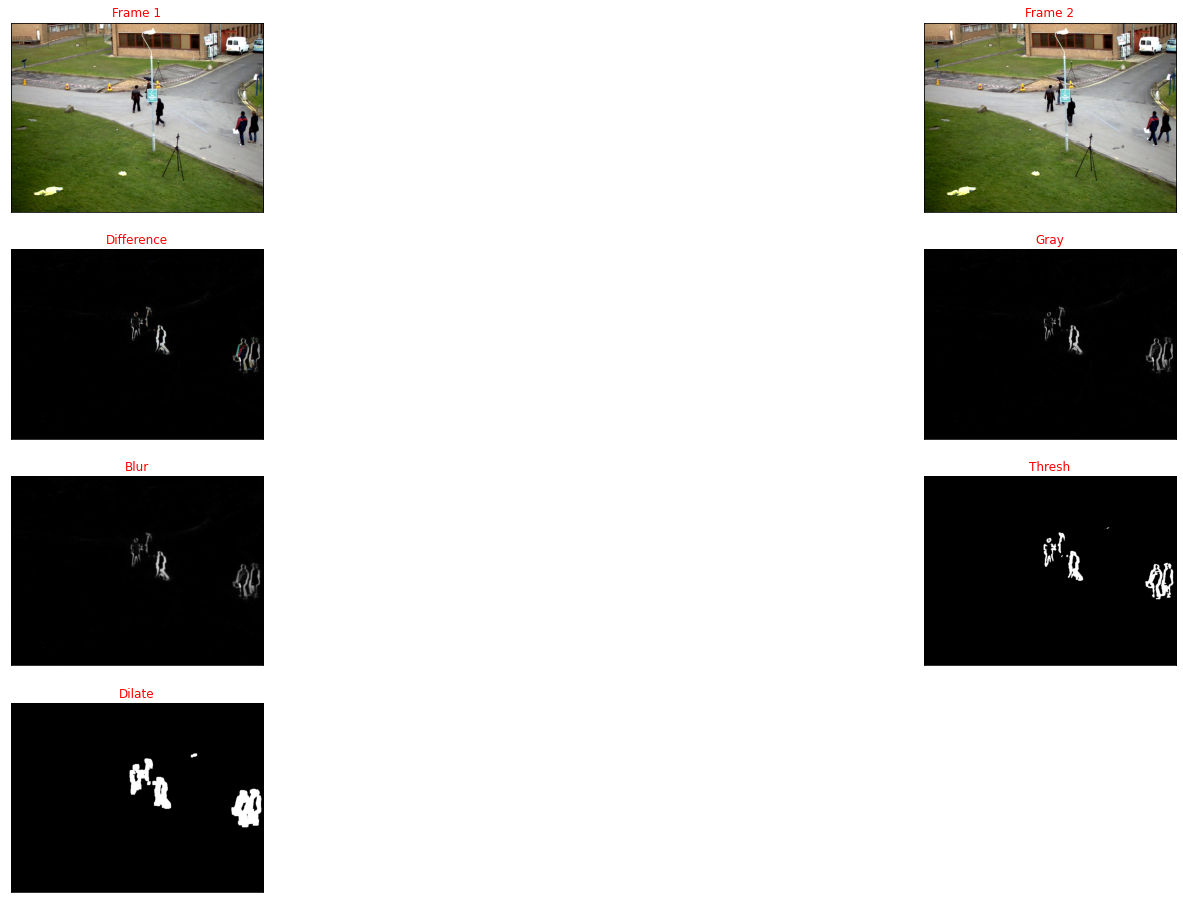

In [6]:
fig = plt.figure(figsize=(30,16))
images = [cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB),cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB),cv2.cvtColor(diff, cv2.COLOR_BGR2RGB),cv2.cvtColor(gray, cv2.COLOR_BGR2RGB),
          cv2.cvtColor(blur, cv2.COLOR_BGR2RGB),cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB),cv2.cvtColor(dilated, cv2.COLOR_BGR2RGB)]
titles = ['Frame 1','Frame 2','Difference','Gray','Blur','Thresh','Dilate']
for i in range(7):
    plt.subplot(4,2,i+1)
    plt.imshow(images[i])
    plt.title(titles[i], color='red')
    plt.xticks([])
    plt.yticks([])
plt.show()

### Self Practice

In [9]:
import cv2
import numpy as np

cap = cv2.VideoCapture('vtest.avi')
ret,frame1 = cap.read()
ret,frame2 = cap.read()

while(True):
    diff = cv2.absdiff(frame1,frame2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5), 0)
    _,thresh = cv2.threshold(blur,20,255,cv2.THRESH_BINARY)
    dilated = cv2.dilate(thresh, None, iterations=3)
    
    contours,_ = cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    
    for contour in contours:
        (x,y,w,h) = cv2.boundingRect(contour)
        print('X: ',x,'\n')
        print('Y: ',y,'\n')
        print('W: ',w,'\n')
        print('H: ',h,'\n')
        print('Area: ', cv2.contourArea(contour))
        if cv2.contourArea(contour) < 700:
            continue
        else:
            cv2.rectangle(frame1, (x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(frame1,'Status: {}'.format('Movement'),(10,20), cv2.FONT_HERSHEY_SIMPLEX,
                       1,(0,0,255), 3)
            
    cv2.imshow('Video',frame1)
    cv2.imshow('Mask',thresh)
    frame1 = frame2
    ret, frame2 = cap.read()
    k = cv2.waitKey(10) & 0xFF
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

X:  630 

Y:  237 

W:  58 

H:  93 

Area:  3340.5
X:  660 

Y:  262 

W:  5 

H:  31 

Area:  71.0
X:  250 

Y:  215 

W:  56 

H:  96 

Area:  3403.5
X:  266 

Y:  267 

W:  7 

H:  6 

Area:  20.5
X:  302 

Y:  194 

W:  29 

H:  9 

Area:  194.5
X:  249 

Y:  192 

W:  50 

H:  11 

Area:  407.5
X:  386 

Y:  191 

W:  14 

H:  8 

Area:  86.5
X:  494 

Y:  154 

W:  39 

H:  86 

Area:  2049.5
X:  511 

Y:  176 

W:  10 

H:  15 

Area:  102.5
X:  573 

Y:  142 

W:  17 

H:  15 

Area:  133.0
X:  629 

Y:  238 

W:  58 

H:  92 

Area:  3322.5
X:  653 

Y:  277 

W:  4 

H:  10 

Area:  19.5
X:  652 

Y:  264 

W:  3 

H:  9 

Area:  14.0
X:  254 

Y:  215 

W:  57 

H:  96 

Area:  3457.5
X:  272 

Y:  268 

W:  6 

H:  4 

Area:  13.0
X:  273 

Y:  241 

W:  3 

H:  3 

Area:  2.0
X:  288 

Y:  195 

W:  7 

H:  7 

Area:  36.0
X:  360 

Y:  193 

W:  16 

H:  10 

Area:  126.0
X:  251 

Y:  192 

W:  10 

H:  8 

Area:  62.5
X:  402 

Y:  191 

W:  7 

H:  7 

Area:  36.0
X: 

H:  10 

Area:  105.0
X:  448 

Y:  164 

W:  43 

H:  89 

Area:  2714.5
X:  555 

Y:  158 

W:  8 

H:  7 

Area:  42.0
X:  569 

Y:  151 

W:  8 

H:  7 

Area:  42.0
X:  414 

Y:  33 

W:  11 

H:  8 

Area:  70.0
X:  711 

Y:  287 

W:  57 

H:  125 

Area:  4664.0
X:  741 

Y:  326 

W:  21 

H:  30 

Area:  340.5
X:  506 

Y:  232 

W:  55 

H:  98 

Area:  3393.0
X:  524 

Y:  275 

W:  3 

H:  10 

Area:  16.0
X:  331 

Y:  197 

W:  44 

H:  91 

Area:  2636.5
X:  353 

Y:  245 

W:  4 

H:  4 

Area:  5.5
X:  343 

Y:  217 

W:  13 

H:  20 

Area:  58.5
X:  322 

Y:  194 

W:  9 

H:  8 

Area:  56.0
X:  306 

Y:  194 

W:  12 

H:  8 

Area:  76.5
X:  508 

Y:  170 

W:  17 

H:  10 

Area:  119.0
X:  438 

Y:  167 

W:  44 

H:  87 

Area:  2476.5
X:  763 

Y:  288 

W:  5 

H:  10 

Area:  35.0
X:  708 

Y:  284 

W:  60 

H:  126 

Area:  4973.5
X:  753 

Y:  357 

W:  7 

H:  14 

Area:  46.5
X:  718 

Y:  354 

W:  3 

H:  3 

Area:  2.0
X:  735 

Y:  323 

W:  22 

H

X:  648 

Y:  253 

W:  85 

H:  117 

Area:  6937.0
X:  659 

Y:  324 

W:  5 

H:  3 

Area:  6.0
X:  674 

Y:  293 

W:  9 

H:  26 

Area:  100.0
X:  699 

Y:  276 

W:  17 

H:  45 

Area:  421.0
X:  370 

Y:  173 

W:  76 

H:  139 

Area:  4485.0
X:  386 

Y:  238 

W:  5 

H:  7 

Area:  16.0
X:  394 

Y:  225 

W:  3 

H:  3 

Area:  2.0
X:  392 

Y:  223 

W:  3 

H:  3 

Area:  2.0
X:  477 

Y:  169 

W:  49 

H:  16 

Area:  362.0
X:  580 

Y:  133 

W:  21 

H:  18 

Area:  172.5
X:  635 

Y:  253 

W:  96 

H:  112 

Area:  7198.5
X:  686 

Y:  326 

W:  3 

H:  3 

Area:  2.0
X:  657 

Y:  323 

W:  4 

H:  3 

Area:  4.0
X:  672 

Y:  298 

W:  6 

H:  17 

Area:  52.5
X:  696 

Y:  276 

W:  15 

H:  45 

Area:  368.0
X:  429 

Y:  239 

W:  15 

H:  24 

Area:  269.0
X:  370 

Y:  175 

W:  64 

H:  133 

Area:  3378.5
X:  530 

Y:  166 

W:  7 

H:  7 

Area:  36.0
X:  539 

Y:  162 

W:  8 

H:  8 

Area:  49.0
X:  579 

Y:  140 

W:  14 

H:  11 

Area:  109.0
X:  

Y:  152 

W:  7 

H:  8 

Area:  42.0
X:  577 

Y:  139 

W:  16 

H:  13 

Area:  124.0
X:  747 

Y:  282 

W:  21 

H:  123 

Area:  1423.5
X:  564 

Y:  231 

W:  85 

H:  107 

Area:  6718.5
X:  606 

Y:  324 

W:  3 

H:  3 

Area:  2.0
X:  621 

Y:  264 

W:  11 

H:  26 

Area:  128.0
X:  626 

Y:  256 

W:  3 

H:  4 

Area:  4.0
X:  258 

Y:  192 

W:  41 

H:  10 

Area:  328.5
X:  304 

Y:  191 

W:  57 

H:  10 

Area:  465.0
X:  238 

Y:  191 

W:  7 

H:  7 

Area:  36.0
X:  224 

Y:  191 

W:  7 

H:  7 

Area:  36.0
X:  210 

Y:  190 

W:  8 

H:  7 

Area:  42.0
X:  370 

Y:  175 

W:  91 

H:  104 

Area:  4997.0
X:  427 

Y:  247 

W:  3 

H:  3 

Area:  2.0
X:  409 

Y:  239 

W:  5 

H:  3 

Area:  6.0
X:  397 

Y:  197 

W:  3 

H:  3 

Area:  2.0
X:  379 

Y:  196 

W:  11 

H:  23 

Area:  135.5
X:  512 

Y:  173 

W:  8 

H:  7 

Area:  42.0
X:  580 

Y:  140 

W:  12 

H:  12 

Area:  93.0
X:  731 

Y:  277 

W:  37 

H:  128 

Area:  2416.0
X:  558 

Y:  229 

X:  664 

Y:  255 

W:  58 

H:  123 

Area:  4975.0
X:  696 

Y:  284 

W:  6 

H:  19 

Area:  57.0
X:  386 

Y:  243 

W:  7 

H:  8 

Area:  42.0
X:  497 

Y:  212 

W:  100 

H:  105 

Area:  7447.5
X:  506 

Y:  269 

W:  3 

H:  3 

Area:  2.0
X:  542 

Y:  268 

W:  12 

H:  31 

Area:  182.5
X:  571 

Y:  257 

W:  4 

H:  9 

Area:  20.5
X:  370 

Y:  199 

W:  12 

H:  26 

Area:  201.0
X:  279 

Y:  193 

W:  9 

H:  7 

Area:  48.0
X:  408 

Y:  178 

W:  19 

H:  18 

Area:  276.5
X:  375 

Y:  177 

W:  57 

H:  83 

Area:  1469.5
X:  383 

Y:  183 

W:  4 

H:  5 

Area:  7.0
X:  430 

Y:  172 

W:  41 

H:  81 

Area:  1907.5
X:  22 

Y:  168 

W:  8 

H:  7 

Area:  42.0
X:  667 

Y:  252 

W:  51 

H:  125 

Area:  4196.0
X:  683 

Y:  276 

W:  14 

H:  38 

Area:  327.0
X:  385 

Y:  228 

W:  15 

H:  28 

Area:  303.0
X:  407 

Y:  212 

W:  21 

H:  54 

Area:  660.0
X:  545 

Y:  211 

W:  47 

H:  96 

Area:  2790.0
X:  561 

Y:  232 

W:  9 

H:  37 

Area:  

W:  14 

H:  26 

Area:  176.5
X:  506 

Y:  215 

W:  13 

H:  37 

Area:  251.5
X:  278 

Y:  192 

W:  12 

H:  9 

Area:  86.5
X:  265 

Y:  192 

W:  11 

H:  8 

Area:  69.5
X:  401 

Y:  180 

W:  19 

H:  18 

Area:  272.0
X:  335 

Y:  166 

W:  78 

H:  92 

Area:  3606.5
X:  359 

Y:  201 

W:  5 

H:  11 

Area:  24.0
X:  0 

Y:  166 

W:  14 

H:  8 

Area:  78.0
X:  564 

Y:  142 

W:  26 

H:  19 

Area:  245.5
X:  594 

Y:  131 

W:  8 

H:  9 

Area:  55.0
X:  298 

Y:  67 

W:  7 

H:  8 

Area:  42.0
X:  601 

Y:  222 

W:  46 

H:  118 

Area:  3568.0
X:  612 

Y:  262 

W:  3 

H:  4 

Area:  4.0
X:  617 

Y:  246 

W:  15 

H:  32 

Area:  276.0
X:  276 

Y:  193 

W:  22 

H:  8 

Area:  145.0
X:  451 

Y:  192 

W:  77 

H:  99 

Area:  5789.5
X:  503 

Y:  214 

W:  11 

H:  36 

Area:  169.0
X:  237 

Y:  192 

W:  7 

H:  7 

Area:  36.0
X:  402 

Y:  179 

W:  28 

H:  26 

Area:  423.0
X:  478 

Y:  178 

W:  10 

H:  8 

Area:  62.5
X:  0 

Y:  165 

W:  2

X:  387 

Y:  202 

W:  29 

H:  29 

Area:  663.5
X:  576 

Y:  198 

W:  40 

H:  111 

Area:  2876.0
X:  586 

Y:  220 

W:  20 

H:  32 

Area:  413.5
X:  368 

Y:  198 

W:  16 

H:  38 

Area:  315.0
X:  320 

Y:  193 

W:  12 

H:  7 

Area:  66.0
X:  306 

Y:  193 

W:  11 

H:  8 

Area:  68.5
X:  439 

Y:  175 

W:  69 

H:  100 

Area:  4227.0
X:  483 

Y:  200 

W:  16 

H:  32 

Area:  321.5
X:  504 

Y:  167 

W:  16 

H:  11 

Area:  113.5
X:  264 

Y:  166 

W:  40 

H:  75 

Area:  2163.5
X:  283 

Y:  185 

W:  8 

H:  26 

Area:  127.5
X:  527 

Y:  161 

W:  16 

H:  10 

Area:  117.5
X:  580 

Y:  131 

W:  22 

H:  20 

Area:  197.5
X:  281 

Y:  60 

W:  15 

H:  24 

Area:  254.5
X:  288 

Y:  50 

W:  7 

H:  7 

Area:  36.0
X:  446 

Y:  214 

W:  8 

H:  7 

Area:  42.0
X:  334 

Y:  207 

W:  7 

H:  7 

Area:  36.0
X:  387 

Y:  204 

W:  29 

H:  28 

Area:  621.5
X:  367 

Y:  200 

W:  14 

H:  25 

Area:  243.0
X:  574 

Y:  195 

W:  40 

H:  109 

Are

W:  15 

H:  23 

Area:  240.0
X:  411 

Y:  182 

W:  16 

H:  13 

Area:  130.5
X:  380 

Y:  181 

W:  38 

H:  82 

Area:  1419.0
X:  387 

Y:  233 

W:  3 

H:  5 

Area:  6.0
X:  268 

Y:  177 

W:  41 

H:  81 

Area:  2239.0
X:  279 

Y:  199 

W:  14 

H:  23 

Area:  206.5
X:  564 

Y:  175 

W:  30 

H:  30 

Area:  496.5
X:  524 

Y:  167 

W:  8 

H:  8 

Area:  48.5
X:  446 

Y:  162 

W:  66 

H:  85 

Area:  3332.0
X:  457 

Y:  182 

W:  15 

H:  30 

Area:  250.0
X:  533 

Y:  160 

W:  20 

H:  13 

Area:  155.5
X:  253 

Y:  50 

W:  23 

H:  41 

Area:  685.0
X:  409 

Y:  240 

W:  16 

H:  13 

Area:  166.0
X:  491 

Y:  231 

W:  13 

H:  15 

Area:  161.0
X:  590 

Y:  207 

W:  7 

H:  9 

Area:  48.0
X:  562 

Y:  207 

W:  35 

H:  67 

Area:  1224.5
X:  326 

Y:  189 

W:  10 

H:  7 

Area:  54.0
X:  315 

Y:  188 

W:  9 

H:  8 

Area:  55.5
X:  342 

Y:  180 

W:  76 

H:  78 

Area:  1838.5
X:  271 

Y:  179 

W:  42 

H:  79 

Area:  2343.0
X:  282 



Y:  55 

W:  25 

H:  41 

Area:  779.5
X:  415 

Y:  33 

W:  8 

H:  8 

Area:  49.0
X:  418 

Y:  254 

W:  12 

H:  10 

Area:  93.5
X:  383 

Y:  252 

W:  9 

H:  9 

Area:  64.0
X:  430 

Y:  240 

W:  9 

H:  10 

Area:  69.5
X:  419 

Y:  240 

W:  10 

H:  13 

Area:  101.0
X:  232 

Y:  186 

W:  67 

H:  10 

Area:  554.5
X:  206 

Y:  186 

W:  7 

H:  7 

Area:  36.0
X:  219 

Y:  185 

W:  12 

H:  8 

Area:  76.0
X:  429 

Y:  183 

W:  16 

H:  24 

Area:  250.0
X:  300 

Y:  175 

W:  122 

H:  103 

Area:  4653.5
X:  334 

Y:  213 

W:  11 

H:  24 

Area:  148.5
X:  579 

Y:  155 

W:  33 

H:  91 

Area:  2068.0
X:  601 

Y:  200 

W:  3 

H:  3 

Area:  2.0
X:  589 

Y:  173 

W:  14 

H:  29 

Area:  262.5
X:  478 

Y:  147 

W:  58 

H:  85 

Area:  3727.5
X:  495 

Y:  189 

W:  6 

H:  6 

Area:  20.5
X:  492 

Y:  175 

W:  5 

H:  13 

Area:  28.5
X:  511 

Y:  167 

W:  14 

H:  30 

Area:  254.5
X:  226 

Y:  55 

W:  24 

H:  42 

Area:  762.0
X:  418 

Y


Y:  167 

W:  57 

H:  21 

Area:  465.0
X:  522 

Y:  166 

W:  10 

H:  8 

Area:  62.0
X:  542 

Y:  128 

W:  66 

H:  76 

Area:  3501.0
X:  585 

Y:  150 

W:  10 

H:  25 

Area:  149.0
X:  562 

Y:  150 

W:  5 

H:  10 

Area:  28.0
X:  639 

Y:  127 

W:  36 

H:  80 

Area:  1817.5
X:  651 

Y:  144 

W:  11 

H:  22 

Area:  143.5
X:  167 

Y:  66 

W:  27 

H:  41 

Area:  806.5
X:  430 

Y:  239 

W:  13 

H:  23 

Area:  215.0
X:  685 

Y:  213 

W:  63 

H:  101 

Area:  4193.5
X:  492 

Y:  209 

W:  52 

H:  92 

Area:  3553.0
X:  369 

Y:  178 

W:  39 

H:  85 

Area:  2086.0
X:  379 

Y:  202 

W:  11 

H:  19 

Area:  134.0
X:  413 

Y:  176 

W:  30 

H:  31 

Area:  623.5
X:  458 

Y:  163 

W:  78 

H:  26 

Area:  767.5
X:  641 

Y:  126 

W:  38 

H:  82 

Area:  2100.0
X:  655 

Y:  145 

W:  10 

H:  19 

Area:  97.0
X:  542 

Y:  124 

W:  72 

H:  81 

Area:  3971.5
X:  592 

Y:  154 

W:  5 

H:  17 

Area:  40.0
X:  162 

Y:  66 

W:  29 

H:  45 

Are


W:  59 

H:  77 

Area:  3296.5
X:  597 

Y:  141 

W:  4 

H:  5 

Area:  8.5
X:  620 

Y:  139 

W:  7 

H:  21 

Area:  70.5
X:  131 

Y:  73 

W:  28 

H:  44 

Area:  910.0
X:  748 

Y:  254 

W:  20 

H:  98 

Area:  1040.0
X:  434 

Y:  240 

W:  9 

H:  13 

Area:  91.5
X:  420 

Y:  239 

W:  9 

H:  12 

Area:  86.5
X:  584 

Y:  198 

W:  61 

H:  114 

Area:  4562.5
X:  614 

Y:  251 

W:  7 

H:  27 

Area:  76.5
X:  430 

Y:  192 

W:  15 

H:  15 

Area:  162.5
X:  378 

Y:  180 

W:  34 

H:  80 

Area:  1617.5
X:  389 

Y:  244 

W:  6 

H:  10 

Area:  37.5
X:  468 

Y:  179 

W:  10 

H:  9 

Area:  72.0
X:  417 

Y:  176 

W:  12 

H:  24 

Area:  227.5
X:  479 

Y:  165 

W:  68 

H:  21 

Area:  648.5
X:  549 

Y:  151 

W:  28 

H:  18 

Area:  254.0
X:  680 

Y:  116 

W:  28 

H:  77 

Area:  1595.0
X:  691 

Y:  132 

W:  7 

H:  21 

Area:  95.5
X:  580 

Y:  116 

W:  67 

H:  73 

Area:  3050.5
X:  598 

Y:  138 

W:  11 

H:  18 

Area:  86.5
X:  622 

Y:

H:  6 

Area:  8.0
X:  638 

Y:  126 

W:  8 

H:  29 

Area:  136.0
X:  107 

Y:  78 

W:  22 

H:  46 

Area:  809.5
X:  420 

Y:  239 

W:  26 

H:  26 

Area:  474.5
X:  659 

Y:  223 

W:  70 

H:  123 

Area:  5467.5
X:  691 

Y:  283 

W:  6 

H:  5 

Area:  18.0
X:  702 

Y:  270 

W:  5 

H:  7 

Area:  15.5
X:  385 

Y:  219 

W:  9 

H:  11 

Area:  79.0
X:  383 

Y:  208 

W:  35 

H:  64 

Area:  906.0
X:  511 

Y:  187 

W:  59 

H:  89 

Area:  3595.0
X:  525 

Y:  233 

W:  3 

H:  3 

Area:  2.0
X:  384 

Y:  180 

W:  24 

H:  38 

Area:  535.5
X:  466 

Y:  178 

W:  10 

H:  9 

Area:  70.5
X:  421 

Y:  178 

W:  36 

H:  53 

Area:  977.0
X:  477 

Y:  174 

W:  15 

H:  10 

Area:  115.0
X:  501 

Y:  137 

W:  94 

H:  42 

Area:  940.0
X:  700 

Y:  110 

W:  28 

H:  76 

Area:  1447.5
X:  710 

Y:  126 

W:  11 

H:  22 

Area:  112.5
X:  608 

Y:  109 

W:  56 

H:  74 

Area:  2963.0
X:  641 

Y:  132 

W:  9 

H:  21 

Area:  105.5
X:  103 

Y:  79 

W:  2

X:  763 

Y:  299 

W:  5 

H:  16 

Area:  59.5
X:  763 

Y:  255 

W:  5 

H:  17 

Area:  62.0
X:  587 

Y:  224 

W:  52 

H:  100 

Area:  3284.0
X:  605 

Y:  283 

W:  4 

H:  5 

Area:  10.0
X:  384 

Y:  191 

W:  35 

H:  89 

Area:  1956.0
X:  303 

Y:  186 

W:  10 

H:  8 

Area:  62.0
X:  429 

Y:  175 

W:  55 

H:  100 

Area:  3172.5
X:  481 

Y:  161 

W:  64 

H:  22 

Area:  572.0
X:  551 

Y:  149 

W:  24 

H:  13 

Area:  198.0
X:  709 

Y:  141 

W:  14 

H:  35 

Area:  343.0
X:  713 

Y:  109 

W:  13 

H:  13 

Area:  112.0
X:  633 

Y:  104 

W:  50 

H:  68 

Area:  2498.5
X:  661 

Y:  122 

W:  11 

H:  26 

Area:  110.5
X:  640 

Y:  119 

W:  16 

H:  29 

Area:  207.5
X:  66 

Y:  87 

W:  29 

H:  42 

Area:  866.0
X:  762 

Y:  302 

W:  6 

H:  16 

Area:  72.0
X:  581 

Y:  223 

W:  50 

H:  97 

Area:  2936.0
X:  384 

Y:  191 

W:  36 

H:  94 

Area:  2043.5
X:  267 

Y:  187 

W:  7 

H:  7 

Area:  36.0
X:  429 

Y:  175 

W:  50 

H:  98 

A

X:  690 

Y:  117 

W:  6 

H:  22 

Area:  65.5
X:  29 

Y:  92 

W:  24 

H:  49 

Area:  854.0
X:  432 

Y:  203 

W:  39 

H:  97 

Area:  2287.0
X:  478 

Y:  199 

W:  45 

H:  113 

Area:  3751.0
X:  496 

Y:  256 

W:  10 

H:  4 

Area:  25.0
X:  491 

Y:  237 

W:  15 

H:  12 

Area:  69.0
X:  466 

Y:  178 

W:  12 

H:  10 

Area:  92.5
X:  479 

Y:  175 

W:  12 

H:  9 

Area:  86.0
X:  332 

Y:  166 

W:  44 

H:  83 

Area:  2430.5
X:  656 

Y:  99 

W:  54 

H:  89 

Area:  3362.5
X:  676 

Y:  146 

W:  3 

H:  3 

Area:  2.0
X:  675 

Y:  144 

W:  3 

H:  4 

Area:  4.0
X:  673 

Y:  133 

W:  5 

H:  13 

Area:  32.0
X:  689 

Y:  116 

W:  8 

H:  22 

Area:  75.0
X:  25 

Y:  93 

W:  26 

H:  50 

Area:  928.5
X:  434 

Y:  200 

W:  88 

H:  112 

Area:  6586.5
X:  495 

Y:  270 

W:  3 

H:  3 

Area:  2.0
X:  495 

Y:  251 

W:  5 

H:  9 

Area:  23.0
X:  453 

Y:  249 

W:  4 

H:  6 

Area:  9.5
X:  454 

Y:  231 

W:  4 

H:  12 

Area:  26.5
X:  467 

Y

X:  476 

Y:  230 

W:  10 

H:  13 

Area:  72.0
X:  534 

Y:  206 

W:  43 

H:  100 

Area:  3068.5
X:  556 

Y:  242 

W:  4 

H:  5 

Area:  7.0
X:  551 

Y:  235 

W:  5 

H:  5 

Area:  9.5
X:  456 

Y:  181 

W:  7 

H:  7 

Area:  36.0
X:  465 

Y:  174 

W:  27 

H:  13 

Area:  221.5
X:  502 

Y:  171 

W:  8 

H:  8 

Area:  48.5
X:  511 

Y:  163 

W:  29 

H:  14 

Area:  226.0
X:  253 

Y:  163 

W:  50 

H:  77 

Area:  2368.5
X:  684 

Y:  149 

W:  14 

H:  12 

Area:  133.5
X:  575 

Y:  140 

W:  20 

H:  17 

Area:  194.5
X:  620 

Y:  119 

W:  37 

H:  76 

Area:  1886.5
X:  631 

Y:  140 

W:  9 

H:  17 

Area:  88.5
X:  708 

Y:  114 

W:  13 

H:  22 

Area:  220.5
X:  0 

Y:  101 

W:  16 

H:  49 

Area:  544.0
X:  669 

Y:  99 

W:  36 

H:  44 

Area:  939.0
X:  677 

Y:  111 

W:  12 

H:  25 

Area:  166.0
X:  399 

Y:  208 

W:  104 

H:  100 

Area:  6528.0
X:  431 

Y:  276 

W:  3 

H:  4 

Area:  4.0
X:  480 

Y:  236 

W:  8 

H:  17 

Area:  97.0

X:  533 

Y:  250 

W:  15 

H:  21 

Area:  214.0
X:  609 

Y:  221 

W:  56 

H:  91 

Area:  3303.5
X:  635 

Y:  254 

W:  9 

H:  15 

Area:  72.5
X:  320 

Y:  206 

W:  51 

H:  89 

Area:  2578.5
X:  166 

Y:  157 

W:  45 

H:  73 

Area:  2265.0
X:  557 

Y:  129 

W:  45 

H:  76 

Area:  2121.0
X:  577 

Y:  154 

W:  7 

H:  9 

Area:  37.0
X:  687 

Y:  122 

W:  17 

H:  36 

Area:  398.5
X:  711 

Y:  119 

W:  16 

H:  26 

Area:  191.5
X:  686 

Y:  97 

W:  10 

H:  11 

Area:  86.0
X:  523 

Y:  225 

W:  53 

H:  108 

Area:  3576.0
X:  550 

Y:  308 

W:  3 

H:  3 

Area:  2.0
X:  541 

Y:  254 

W:  11 

H:  14 

Area:  82.5
X:  621 

Y:  221 

W:  57 

H:  101 

Area:  4009.5
X:  641 

Y:  272 

W:  5 

H:  8 

Area:  16.0
X:  645 

Y:  257 

W:  5 

H:  4 

Area:  8.5
X:  305 

Y:  205 

W:  57 

H:  89 

Area:  3436.0
X:  325 

Y:  275 

W:  3 

H:  6 

Area:  8.0
X:  320 

Y:  186 

W:  8 

H:  7 

Area:  42.0
X:  304 

Y:  185 

W:  15 

H:  10 

Area:  122

X:  585 

Y:  251 

W:  58 

H:  118 

Area:  4100.0
X:  599 

Y:  281 

W:  18 

H:  24 

Area:  241.0
X:  678 

Y:  240 

W:  57 

H:  100 

Area:  3624.5
X:  699 

Y:  274 

W:  19 

H:  36 

Area:  367.0
X:  223 

Y:  192 

W:  50 

H:  84 

Area:  2494.5
X:  250 

Y:  211 

W:  9 

H:  21 

Area:  73.5
X:  97 

Y:  151 

W:  39 

H:  72 

Area:  1854.0
X:  497 

Y:  136 

W:  103 

H:  88 

Area:  2748.5
X:  519 

Y:  175 

W:  5 

H:  6 

Area:  13.5
X:  520 

Y:  161 

W:  3 

H:  3 

Area:  2.0
X:  705 

Y:  130 

W:  13 

H:  18 

Area:  157.5
X:  694 

Y:  122 

W:  9 

H:  8 

Area:  56.0
X:  677 

Y:  110 

W:  9 

H:  11 

Area:  77.5
X:  705 

Y:  104 

W:  11 

H:  12 

Area:  104.5
X:  685 

Y:  94 

W:  19 

H:  21 

Area:  257.0
X:  587 

Y:  255 

W:  62 

H:  117 

Area:  4720.0
X:  611 

Y:  287 

W:  10 

H:  18 

Area:  102.5
X:  687 

Y:  240 

W:  53 

H:  115 

Area:  4098.5
X:  705 

Y:  275 

W:  18 

H:  36 

Area:  293.0
X:  221 

Y:  187 

W:  50 

H:  91

W:  10 

H:  9 

Area:  70.5
X:  167 

Y:  182 

W:  44 

H:  80 

Area:  2329.5
X:  542 

Y:  154 

W:  21 

H:  12 

Area:  154.5
X:  699 

Y:  152 

W:  10 

H:  11 

Area:  88.0
X:  434 

Y:  148 

W:  41 

H:  88 

Area:  2362.0
X:  450 

Y:  183 

W:  3 

H:  5 

Area:  6.0
X:  451 

Y:  173 

W:  8 

H:  8 

Area:  27.0
X:  35 

Y:  146 

W:  36 

H:  66 

Area:  1680.5
X:  585 

Y:  134 

W:  16 

H:  15 

Area:  150.0
X:  697 

Y:  119 

W:  11 

H:  10 

Area:  87.5
X:  662 

Y:  98 

W:  31 

H:  60 

Area:  1308.5
X:  674 

Y:  111 

W:  9 

H:  22 

Area:  116.5
X:  650 

Y:  286 

W:  57 

H:  126 

Area:  3851.5
X:  675 

Y:  366 

W:  3 

H:  4 

Area:  4.0
X:  668 

Y:  355 

W:  9 

H:  11 

Area:  50.5
X:  662 

Y:  313 

W:  26 

H:  28 

Area:  475.5
X:  742 

Y:  272 

W:  26 

H:  99 

Area:  1562.5
X:  307 

Y:  187 

W:  8 

H:  7 

Area:  42.0
X:  162 

Y:  181 

W:  45 

H:  80 

Area:  2129.5
X:  480 

Y:  175 

W:  8 

H:  8 

Area:  49.0
X:  503 

Y:  159 

X:  414 

Y:  33 

W:  11 

H:  8 

Area:  70.0
X:  596 

Y:  293 

W:  60 

H:  122 

Area:  4616.0
X:  616 

Y:  320 

W:  9 

H:  34 

Area:  199.5
X:  740 

Y:  238 

W:  28 

H:  88 

Area:  1450.5
X:  94 

Y:  180 

W:  48 

H:  77 

Area:  2157.5
X:  113 

Y:  199 

W:  5 

H:  6 

Area:  18.0
X:  507 

Y:  170 

W:  7 

H:  8 

Area:  42.0
X:  522 

Y:  164 

W:  18 

H:  11 

Area:  108.0
X:  541 

Y:  161 

W:  14 

H:  8 

Area:  84.5
X:  362 

Y:  157 

W:  49 

H:  87 

Area:  2589.5
X:  0 

Y:  141 

W:  23 

H:  64 

Area:  1090.5
X:  656 

Y:  103 

W:  48 

H:  68 

Area:  1999.5
X:  688 

Y:  136 

W:  7 

H:  9 

Area:  36.0
X:  665 

Y:  116 

W:  14 

H:  27 

Area:  184.5
X:  580 

Y:  292 

W:  63 

H:  120 

Area:  4513.5
X:  606 

Y:  317 

W:  13 

H:  38 

Area:  306.0
X:  740 

Y:  235 

W:  28 

H:  98 

Area:  1787.5
X:  94 

Y:  179 

W:  44 

H:  78 

Area:  1995.0
X:  108 

Y:  198 

W:  5 

H:  7 

Area:  15.5
X:  467 

Y:  178 

W:  8 

H:  8 

Area: 

In [7]:
cap = cv2.VideoCapture(0)

while(True):
    ret,frame = cap.read()
    if ret == True:
        blur = cv2.GaussianBlur(frame,(5,5),0)
        hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
        lower = np.array([94, 80, 2])
        upper = np.array([126, 255, 255])
        mask = cv2.inRange(hsv,lower,upper)
        contours,_ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
        
        for contour in contours:
            if cv2.contourArea(contour) < 700:
                continue
            else:
                cv2.drawContours(frame, contours, -1, (0,255,0))
        
        cv2.imshow('Frame',frame)
        cv2.imshow('Mask',mask)
        k = cv2.waitKey(1) & 0xFF
        if k == 27:
            break
cap.release()
cv2.destroyAllWindows()

In [18]:
cap = cv2.VideoCapture('vtest.avi')
ret, frame1 = cap.read()
ret, frame2 = cap.read()

while(True):
    diff = cv2.absdiff(frame1, frame2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    _, thresh = cv2.threshold(blur, 30, 255, cv2.THRESH_BINARY)
    dilate = cv2.dilate(thresh, None, iterations=3)
    
    contours, _ = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    for contour in contours:
        (x,y,w,h) = cv2.boundingRect(contour)
        if cv2.contourArea(contour) < 800:
            continue
        else:
            cv2.rectangle(frame1, (x,y), (x+w,y+h), (0,0,255), 2)
            
    cv2.imshow('Video', frame1)
    frame1 = frame2
    ret, frame2 = cap.read()
    
    if cv2.waitKey(20) & 0xFF == 27:
        break
cap.release()
cv2.destroyAllWindows()